In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns

In [2]:
data=pd.read_csv("/content/data.csv")
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [17]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


## Exploratory Data Analysis

In [46]:
data[data['Sleep Disorder']=='None']

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,1,Male,27,Software Engineer,-1.298887,6,-0.769832,0.347021,Overweight,1.654719,-1.619584,None,-0.330002,-0.268102
1,2,Male,28,Doctor,-1.173036,6,0.168009,1.475592,Normal,1.170474,1.970077,None,-0.459239,-0.755640
2,3,Male,28,Doctor,-1.173036,6,0.168009,1.475592,Normal,1.170474,1.970077,None,-0.459239,-0.755640
7,8,Male,29,Doctor,0.840575,7,0.793236,0.347021,Normal,-0.040138,0.732263,None,-1.105421,-0.755640
8,9,Male,29,Doctor,0.840575,7,0.793236,0.347021,Normal,-0.040138,0.732263,None,-1.105421,-0.755640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,342,Female,56,Doctor,1.343978,9,1.418464,-1.345836,Normal Weight,-1.250750,1.970077,None,-1.363894,-1.568203
342,343,Female,56,Doctor,1.343978,9,1.418464,-1.345836,Normal Weight,-1.250750,1.970077,None,-1.363894,-1.568203
343,344,Female,57,Nurse,1.218127,9,0.793236,-1.345836,Overweight,-0.524383,0.113356,None,1.479309,1.682049
358,359,Female,59,Nurse,1.092276,9,0.793236,-1.345836,Overweight,-0.524383,0.113356,None,1.479309,1.682049


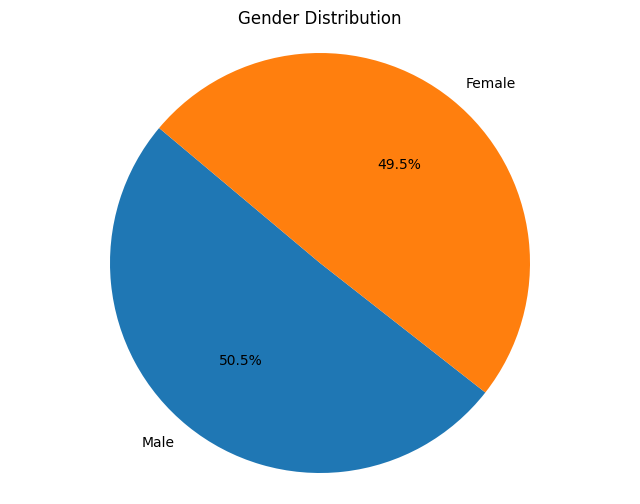

In [24]:
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

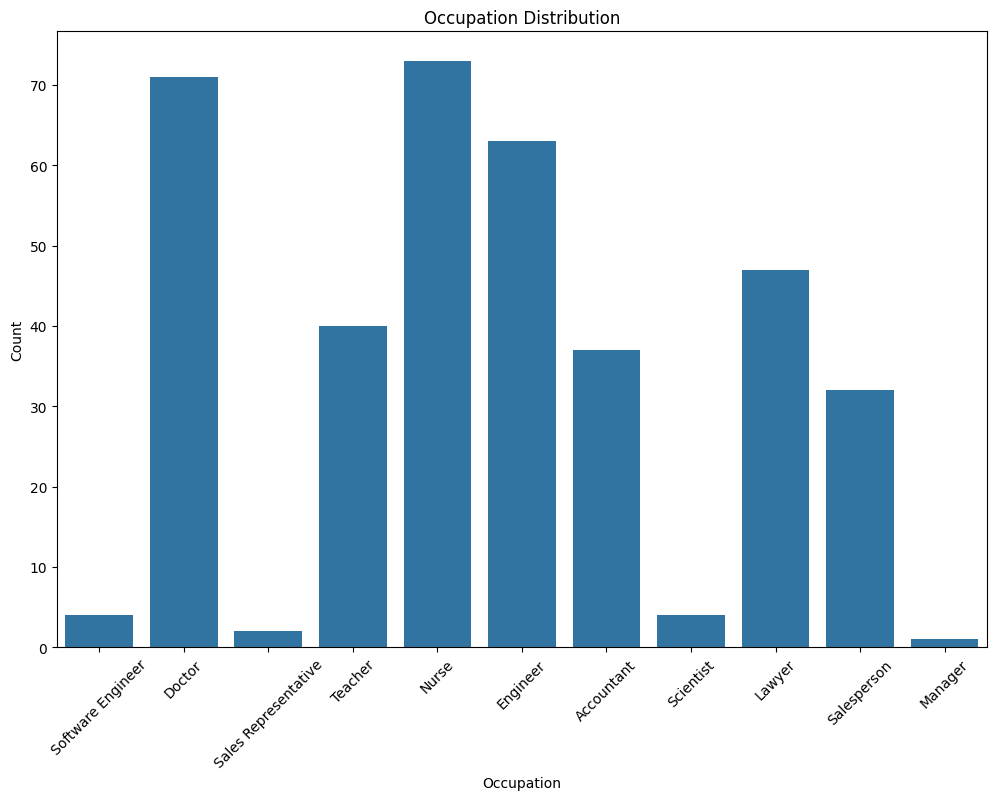

In [25]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Occupation')
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

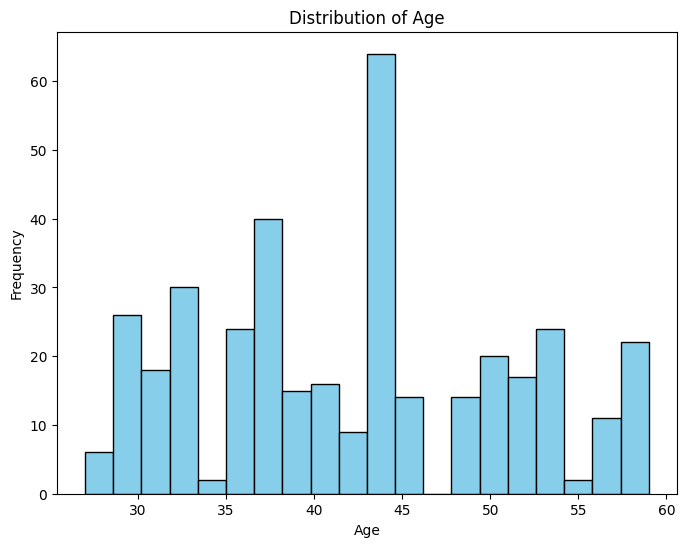

In [7]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


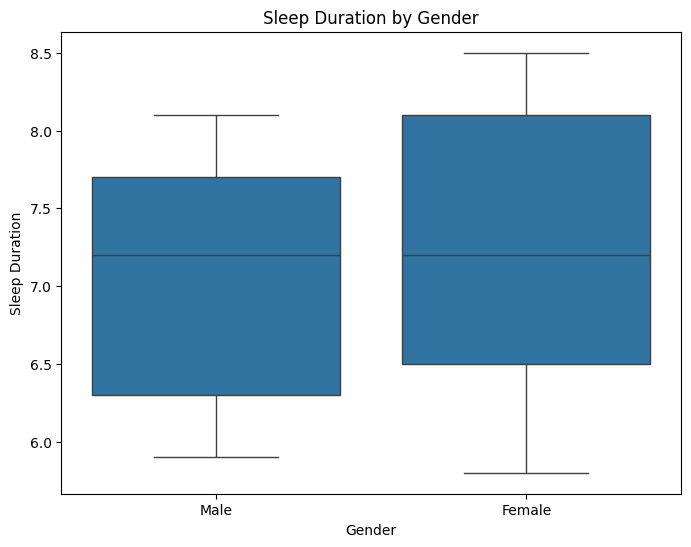

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Sleep Duration', data=df)
plt.xlabel('Gender')
plt.ylabel('Sleep Duration')
plt.title('Sleep Duration by Gender')
plt.show()

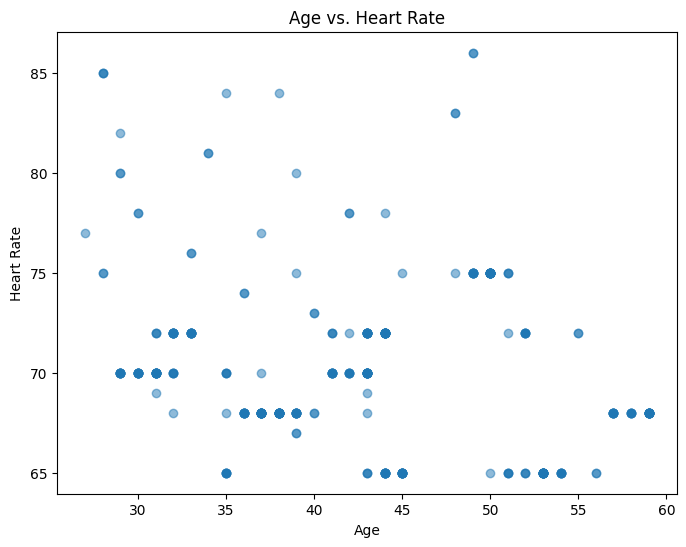

In [9]:
# Scatter Plot of Age vs. Heart Rate
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Heart Rate'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.title('Age vs. Heart Rate')
plt.show()

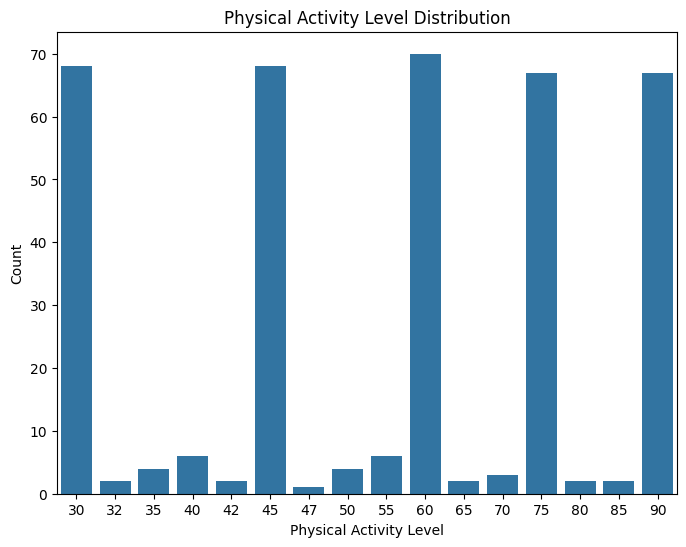

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Physical Activity Level')
plt.title('Physical Activity Level Distribution')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.show()

In [29]:
gender_sleep_disorder_counts = data.groupby(['Gender', 'Sleep Disorder']).size().unstack()
traces = []
for sleep_disorder_status in gender_sleep_disorder_counts.columns:
    trace = go.Bar(
        x=gender_sleep_disorder_counts.index,
        y=gender_sleep_disorder_counts[sleep_disorder_status],
        name=sleep_disorder_status
    )
    traces.append(trace)

layout = go.Layout(
    title='Distribution of Sleep Disorder by Gender',
    xaxis=dict(title='Gender'),
    yaxis=dict(title='Count'),
    barmode='group'
)

fig = go.Figure(data=traces, layout=layout)

fig.show()


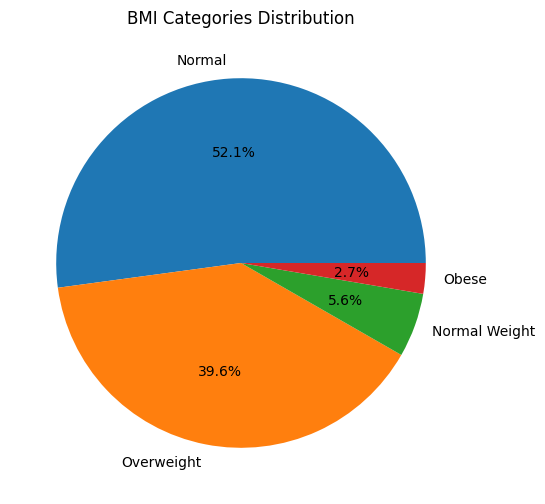

In [10]:
# Pie Chart of BMI Categories
plt.figure(figsize=(8, 6))
df['BMI Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('BMI Categories Distribution')
plt.ylabel('')
plt.show()


<ipython-input-11-eb636c9a69b7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


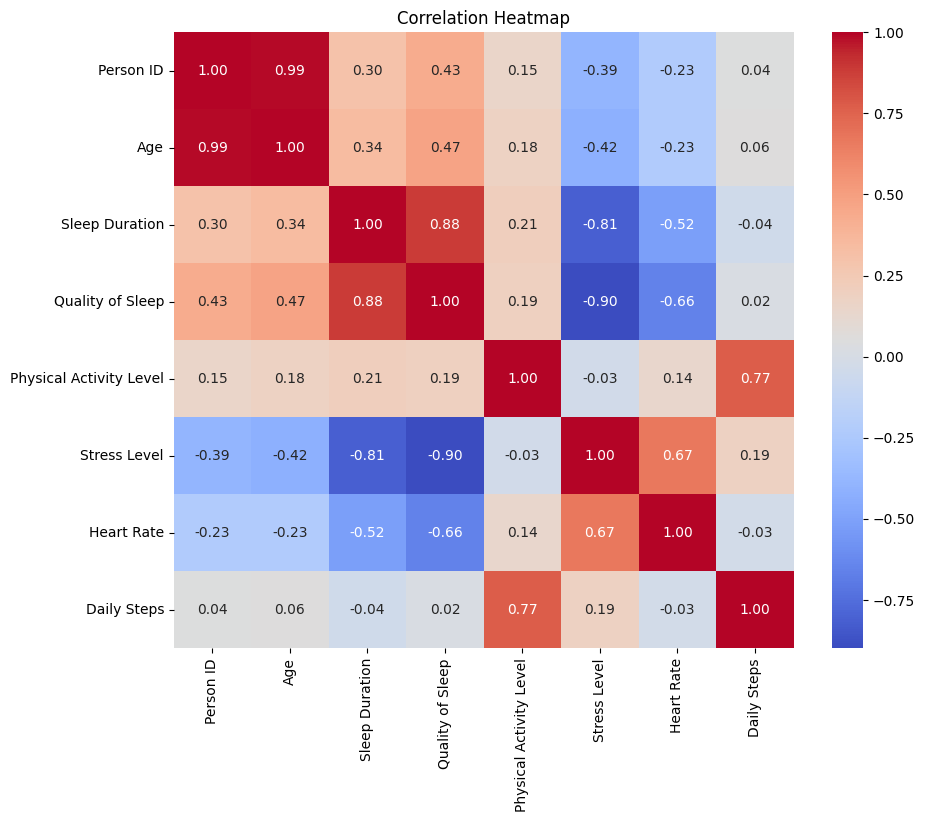

In [11]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

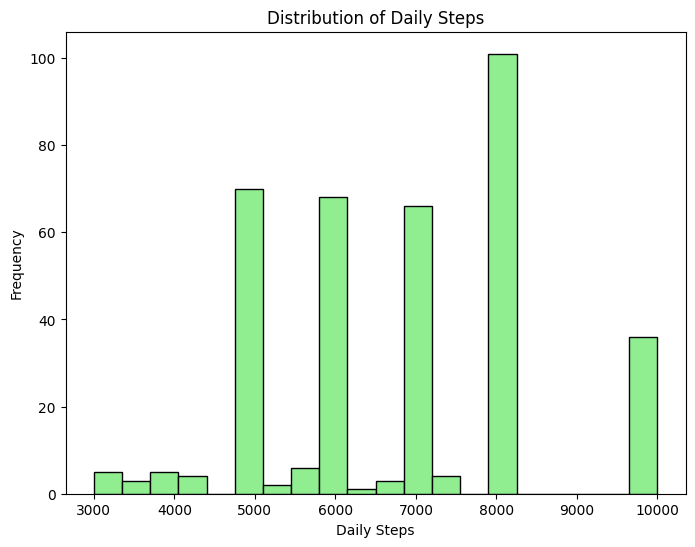

In [12]:
# Histogram of Daily Steps
plt.figure(figsize=(8, 6))
plt.hist(df['Daily Steps'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Daily Steps')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Steps')
plt.show()

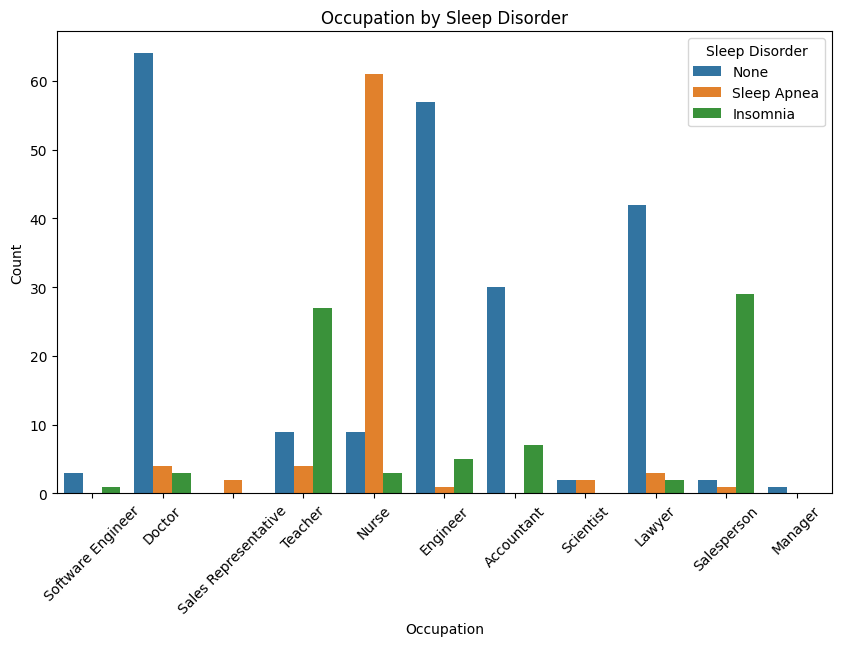

In [13]:
# Stacked Bar Chart of Occupation by Sleep Disorder
plt.figure(figsize=(10, 6))
sns.countplot(x='Occupation', hue='Sleep Disorder', data=df)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation by Sleep Disorder')
plt.xticks(rotation=45)
plt.legend(title='Sleep Disorder')
plt.show()

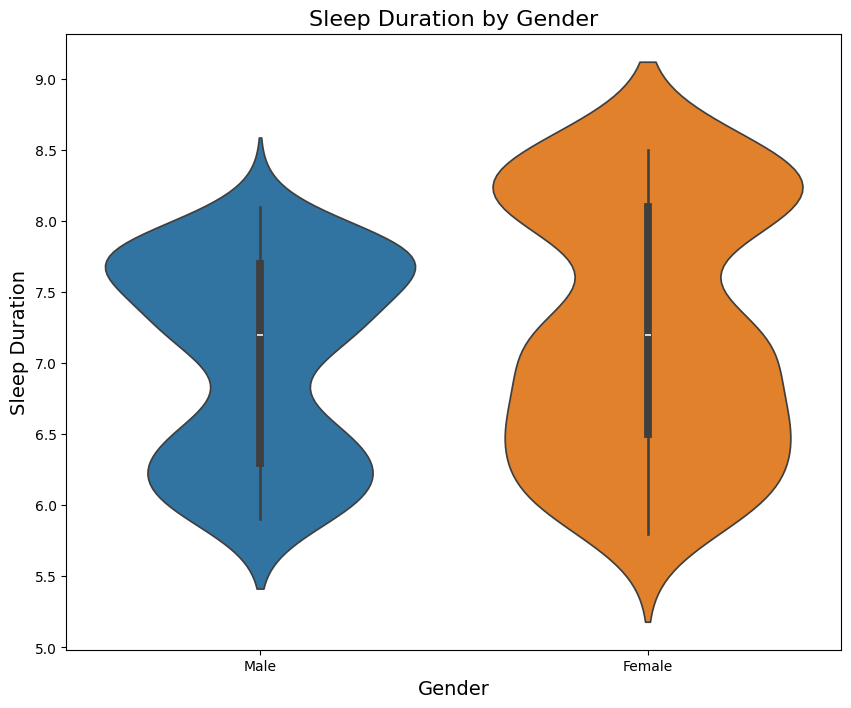

In [30]:
plt.figure(figsize=(10, 8))
sns.violinplot(data=data, x='Gender', y='Sleep Duration',hue='Gender')
plt.title('Sleep Duration by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Sleep Duration', fontsize=14)
plt.show()


In [28]:
import plotly.express as px
fig = px.scatter_3d(df, x='Sleep Duration', y='Stress Level', z='Physical Activity Level', color='Sleep Disorder')
fig.update_layout(title='3D Scatter Plot with Sleep Disorder as Hue')
fig.show()

In [14]:
import plotly.graph_objects as go
import pandas as pd

avg_stress_by_occupation = df.groupby('Occupation')['Stress Level'].mean().reset_index()

color_scale = [[0, 'blue'],
               [1, 'red']]

fig1 = go.Figure(go.Bar(
    x=avg_stress_by_occupation['Stress Level'],
    y=avg_stress_by_occupation['Occupation'],
    marker=dict(color=avg_stress_by_occupation['Stress Level'],
                coloraxis='coloraxis'),
    orientation='h',
    hoverinfo='x+y',
    textposition='inside',
    texttemplate='%{x:.2f}',
))

fig1.update_layout(
    title='Average Stress Level by Occupation',
    yaxis=dict(title='Occupation', tickangle=-30),
    xaxis=dict(title='Average Stress Level'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgb(240, 240, 240)',
    bargap=0.15,
    font=dict(family='Arial', size=12, color='rgb(50, 50, 50)'),
    coloraxis=dict(colorscale=color_scale, cmin=0, cmax=8),
)

# Show the plot
fig1.show()


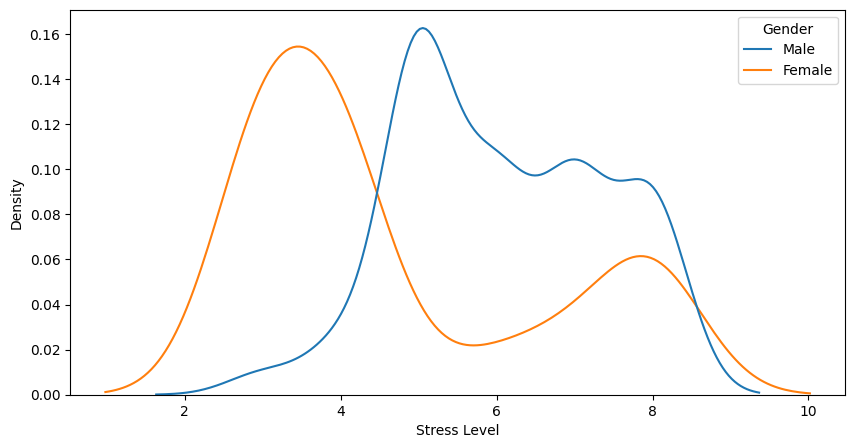

In [15]:
plt.figure(figsize = (10,5))

sns.kdeplot(data=df, x= "Stress Level", hue= "Gender")
plt.show()

In [16]:
import plotly.graph_objects as go
import pandas as pd

occupations = df['Occupation'].unique()
fig = go.Figure()
for i, occupation in enumerate(occupations):
    occupation_data = df[df['Occupation'] == occupation]['Sleep Duration']
    fig.add_trace(go.Box(y=occupation_data, name=occupation))

fig.update_layout(
    title='Sleep Duration by Occupation',
    xaxis=dict(title='Occupation'),
    yaxis=dict(title='Sleep Duration')
)

fig.show()


In [18]:
df=data.copy()

In [19]:
min(df['Sleep Duration']), max(df['Sleep Duration'])

(5.8, 8.5)

In [22]:
lower_bound,upper_bound = min(df['Sleep Duration']), max(df['Sleep Duration'])
filtered_df = df[(df['Sleep Duration'] >= lower_bound) & (df['Sleep Duration'] <= upper_bound)]
sleep_count = filtered_df.groupby(['Sleep Duration', 'Gender']).size().reset_index(name='Count')

In [23]:
pivot_df = sleep_count.pivot(index='Sleep Duration', columns='Gender', values='Count').reset_index()
pivot_df=pivot_df.fillna(0)
print(pivot_df)

Gender  Sleep Duration  Female  Male
0                  5.8     2.0   0.0
1                  5.9     1.0   3.0
2                  6.0    13.0  18.0
3                  6.1    15.0  10.0
4                  6.2     6.0   6.0
5                  6.3     0.0  13.0
6                  6.4     2.0   7.0
7                  6.5    12.0  14.0
8                  6.6    18.0   2.0
9                  6.7     3.0   2.0
10                 6.8     4.0   1.0
11                 6.9     2.0   1.0
12                 7.1    13.0   6.0
13                 7.2    22.0  14.0
14                 7.3     0.0  14.0
15                 7.4     1.0   4.0
16                 7.5     1.0   4.0
17                 7.6     0.0  10.0
18                 7.7     0.0  24.0
19                 7.8     0.0  28.0
20                 7.9     1.0   6.0
21                 8.0    13.0   0.0
22                 8.1    13.0   2.0
23                 8.2    11.0   0.0
24                 8.3     5.0   0.0
25                 8.4    14.0   0.0
2

In [31]:
lower_bound,upper_bound = min(df['Stress Level']), max(df['Stress Level'])
filtered_df = df[(df['Stress Level'] >= lower_bound) & (df['Stress Level'] <= upper_bound)]
stress_count = filtered_df.groupby(['Stress Level', 'Gender']).size().reset_index(name='Count')
pivot_df = stress_count.pivot(index='Stress Level', columns='Gender', values='Count').reset_index()
stress_df=pivot_df.fillna(0)
stress_df

Gender,Stress Level,Female,Male
0,3,67,4
1,4,61,9
2,5,2,65
3,6,9,37
4,7,12,38
5,8,34,36


In [32]:
def normalize_column(df, column_name):
    min_value = df[column_name].min()
    max_value = df[column_name].max()
    df[column_name] = round(1 + ((df[column_name] - min_value) * 9) / (max_value - min_value))


In [33]:
normalize_column(data,'Physical Activity Level')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,3.0,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,6.0,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,6.0,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,1.0,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,1.0,8,Obese,140/90,85,3000,Sleep Apnea


In [34]:
def preprocess_blood_pressure(bp_str):
    systolic, diastolic = bp_str.split('/')
    return float(systolic), float(diastolic)

# Apply preprocessing to the entire dataset
data[['Systolic Pressure', 'Diastolic Pressure']] = data['Blood Pressure'].apply(lambda x: pd.Series(preprocess_blood_pressure(x)))

# Drop the original 'Blood Pressure' column if needed
data.drop(columns=['Blood Pressure'], inplace=True)

data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,1,Male,27,Software Engineer,6.1,6,3.0,6,Overweight,77,4200,None,126.0,83.0
1,2,Male,28,Doctor,6.2,6,6.0,8,Normal,75,10000,None,125.0,80.0
2,3,Male,28,Doctor,6.2,6,6.0,8,Normal,75,10000,None,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,1.0,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,1.0,8,Obese,85,3000,Sleep Apnea,140.0,90.0


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
X = data.drop(columns=['Person ID','Age','Gender', 'Sleep Disorder','Quality of Sleep','Occupation'])
y = data['Sleep Disorder']


In [36]:
from sklearn.preprocessing import LabelEncoder


numerical_features = ['Sleep Duration', 'Physical Activity Level', 'Heart Rate',
                      'Stress Level', 'Systolic Pressure', 'Diastolic Pressure', 'Daily Steps']
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

bmi_labels = {bmi_category: idx for idx, bmi_category in enumerate(X['BMI Category'].unique())}
X['BMI Category'] = X['BMI Category'].map(bmi_labels)

output_labels={op: idx for idx, op in enumerate(y.unique())}
y = y.map(output_labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [40]:
X_train.columns

Index(['Sleep Duration', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Heart Rate', 'Daily Steps', 'Systolic Pressure',
       'Diastolic Pressure'],
      dtype='object')

In [39]:
X_train.shape

(299, 8)

In [38]:
output_labels

{'None': 0, 'Sleep Apnea': 1, 'Insomnia': 2}

In [41]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Assuming y_train and y_test are your label Series
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_test_encoded = encoder.transform(np.array(y_test).reshape(-1, 1)).toarray()


## Model Training

In [42]:
from keras import regularizers

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.4),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['acc'])
model.fit(X_train, y_train_encoded, batch_size=32, epochs=200, validation_split=0.2)
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/200
8/8 [==============================] - 3s 70ms/step - loss: 4.3192 - acc: 0.3556 - val_loss: 3.9635 - val_acc: 0.6167
Epoch 2/200
8/8 [==============================] - 0s 11ms/step - loss: 3.8604 - acc: 0.5983 - val_loss: 3.8888 - val_acc: 0.6667
Epoch 3/200
8/8 [==============================] - 0s 14ms/step - loss: 3.6608 - acc: 0.6611 - val_loss: 3.8164 - val_acc: 0.7000
Epoch 4/200
8/8 [==============================] - 0s 15ms/step - loss: 3.4834 - acc: 0.7573 - val_loss: 3.7479 - val_acc: 0.7000
Epoch 5/200
8/8 [==============================] - 0s 11ms/step - loss: 3.3662 - acc: 0.8326 - val_loss: 3.6792 - val_acc: 0.7167
Epoch 6/200
8/8 [==============================] - 0s 11ms/step - loss: 3.2995 - acc: 0.8201 - val_loss: 3.6054 - val_acc: 0.7833
Epoch 7/200
8/8 [==============================] - 0s 13ms/step - loss: 3.1915 - acc: 0.8661 - val_loss: 3.5329 - val_acc: 0.7833
Epoch 8/200
8/8 [==============================] - 0s 14ms/step - loss: 3.1110 - acc: 0.87

In [43]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



12/12 [==============================] - 0s 2ms/step


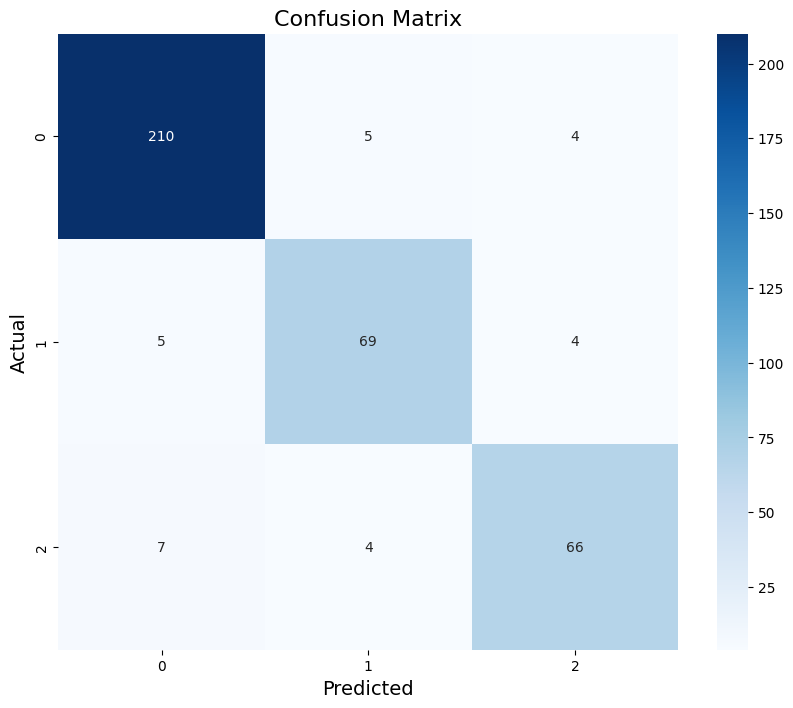

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X).argmax(axis=1)
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

In [45]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test).argmax(axis=1)
print(classification_report(y_pred,y_test))

3/3 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        44
           1       0.81      0.87      0.84        15
           2       0.81      0.81      0.81        16

    accuracy                           0.91        75
   macro avg       0.87      0.88      0.87        75
weighted avg       0.91      0.91      0.91        75



In [47]:
output_labels

{'None': 0, 'Sleep Apnea': 1, 'Insomnia': 2}

## User input data

In [48]:
# Collect input data from the user
input_data = {
    'Sleep Duration': float(input("Enter Sleep Duration: ")),
    'Physical Activity Level': float(input("Enter Physical Activity Level: ")),
    'Heart Rate': float(input("Enter Heart Rate: ")),
    'Stress Level': float(input("Enter Stress Level: ")),
    'Systolic Pressure': float(input("Enter Systolic Pressure: ")),
    'Diastolic Pressure': float(input("Enter Diastolic Pressure: ")),
    'Daily Steps': float(input("Enter Daily Steps: ")),
    'BMI Category': int(input("Enter BMI Category (0-NumCategories): "))
}

# Preprocess input data
input_df = pd.DataFrame([input_data])

# Normalize numerical features
input_df[numerical_features] = scaler.transform(input_df[numerical_features])

# Predict label for input data
predicted_label_idx = model.predict(input_df).argmax(axis=1)[0]
predicted_label = [label for label, idx in output_labels.items() if idx == predicted_label_idx][0]

# Display predicted label to the user
print("Predicted Sleep Disorder:", predicted_label)


Enter Sleep Duration: 6.5
Enter Physical Activity Level: 5
Enter Heart Rate: 77
Enter Stress Level: 6
Enter Systolic Pressure: 120
Enter Diastolic Pressure: 80
Enter Daily Steps: 6000
Enter BMI Category (0-NumCategories): 0
1/1 [==============================] - 0s 21ms/step
Predicted Sleep Disorder: Insomnia


In [49]:
print(input_df)

   Sleep Duration  Physical Activity Level  Heart Rate  Stress Level  \
0       -0.795484                -0.144605    1.654719      0.347021   

   Systolic Pressure  Diastolic Pressure  Daily Steps  BMI Category  
0          -1.105421            -0.75564    -0.505551             0  
